In [149]:
import math
from random import randint
import numpy as np
import matplotlib.pyplot as plt

### Define a Curve object:
Accepts coefficients and modulo of an EC curve as input<br><br>
This could have been done better

In [150]:
class Curve:
    # y^2 = x^3 + ax + b (mod p)
    def __init__(self, a, b, p):
        self.a = a
        self.b = b
        self.p = p

### Define a Point object:
Accepts the coordinate of an EC curve point as points<br>
e.g. a pont P has coords (x,y)

In [151]:
class Point:

    def __init__(self, x, y):
        self.x = x
        self.y = y

    #Check if this point is equal to another point p
    #compares the x and y values of each point
    def is_equal(self, p):
        return (self.x == p.x and self.y == p.y)

    #Check if this point is at infinity
    def is_infinity(self):
        #print(self.x)
        return (math.isinf(self.x) or math.isinf(self.y))

**Generates a private key** <br>
Accepts a Point *p* and Curve *c* <br>
Returns a psuedo random private key between *1* and *p-1* where *p* is the modulo system of the curve<br>

In [152]:
def getECCPrivateKey(p,c):
    return randint(2, c.p - 2 )

**Performs point doubling**<br>
Accepts 2 Points object *p1, p2* and a Curve *c* <br>
This function performs doubling of *p1*. Note *p1* and *p2* should be the same point <br>
Returns a point *p3* which is the result of point doubling of *p1*.

In [153]:
def pointDoubling(c, p1, p2):
    p3 = Point(math.inf, math.inf)

    if (p1.is_infinity()==True or p2.is_infinity() ==True):
        return p3

    
    if (p1.is_equal(p2)):

        m = (3 * p1.x**2 + c.a) * modinv(2 * p1.y, c.p)
        m = m % c.p
        #print("m = {0}".format(m))
        if (not math.isinf(m)):
            p3.x = (m**2 - p1.x - p2.x) % c.p
            p3.y = (m*(p1.x-p3.x) - p1.y) % c.p

    return p3

**Create public key from EC curve**<br>
Accepts a Curve *c*, Point object *p*, Private key *k*
Returns the public key for the curve

In [154]:
def getECCPublicKey(c,p,k):

    pubK = p
    for i in range(1,k):
        pubK = pointDoubling(c,pubK,pubK)
        #print('x: {0}, y:{1}'.format(pubK.x, pubK.y))
    return pubK

**Implementation of extended euclidean**

In [155]:
def egcd(a, p):
    if a==0:
        return (p, 0, 1)
    else:
        g, x, y = egcd(p%a, a)
        return (g, y - (p//a)* x, x)

**Find the multiplicative inverse of *a(mod)p***

In [156]:
def modinv(a, m):
    g, x, y = egcd(a, m)
    if g != 1:
        raise ValueError
    return x % m

**Sample data**

In [157]:
c = Curve(1,1,23) #a curve C defined as y = x^3 + x + 1 (mod 23)
p = Point(9,7)    #a point P = (9,7)

In [158]:
#get random private key
k = getECCPrivateKey(p,c)

In [159]:
#print private key
print("Private Key = {0}".format(k))

Private Key = 12


In [160]:
#generate a public key
pubK = getECCPublicKey(c,p,k)

In [161]:
#print public key
print('Public key = ( x: {0}, y:{1} )'.format(pubK.x, pubK.y))

Public key = ( x: 13, y:16 )


### Generate plot of elliptic curve

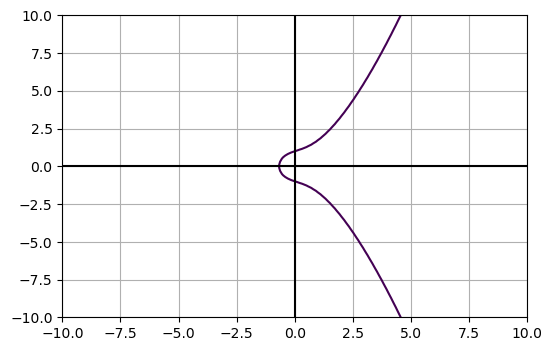

In [162]:
fig, ax = plt.subplots()
xlist = np.linspace(-10, 10, 100)
ylist = np.linspace(-10, 10, 100)
X,Y = np.meshgrid(xlist, ylist)
#y^2 = x^3 + ax + b (mod p)
plt.contour(X, Y, (pow(Y,2) - pow(X,3) - X * 1 - 1), [0])
plt.grid()
ax.axhline(y=0, color="k")
ax.axvline(x=0, color="k")
#plt.plot(9,7, 'g*')
plt.show()

### Plot ellitipic curve mod p
p = 23

Calculate perfect squares mod p

In [163]:
#Calculate perfect squares mod p
p = 23
perfect_squares_input = []
perfect_squares = []
for i in range(1,p):
    sq = i**2 % p
    if not(sq in perfect_squares):
        perfect_squares_input.append(i)
        perfect_squares.append(sq)
print(perfect_squares_input)
print(perfect_squares)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
[1, 4, 9, 16, 2, 13, 3, 18, 12, 8, 6]


Calculate points on the curve mod p

In [164]:
#calculate points on the curve
xpoints_on_curve = []
ypoints_on_curve = []
for i in range(p):
    y_sqr = (pow(i,3) +i * 1 + 1)%23
    if y_sqr in perfect_squares:
        xpoints_on_curve.append(i)
        xpoints_on_curve.append(i)
        sqr_root = perfect_squares.index(y_sqr)+1
        ypoints_on_curve.append(sqr_root % p)
        ypoints_on_curve.append(-sqr_root% p)
print(xpoints_on_curve)
print(ypoints_on_curve)

[0, 0, 1, 1, 3, 3, 5, 5, 6, 6, 7, 7, 9, 9, 11, 11, 12, 12, 13, 13, 17, 17, 18, 18, 19, 19]
[1, 22, 7, 16, 10, 13, 4, 19, 4, 19, 11, 12, 7, 16, 3, 20, 4, 19, 7, 16, 3, 20, 3, 20, 5, 18]


### Generate plot of Elliptic curve mod p
Note the horizontal symmetry of the points.

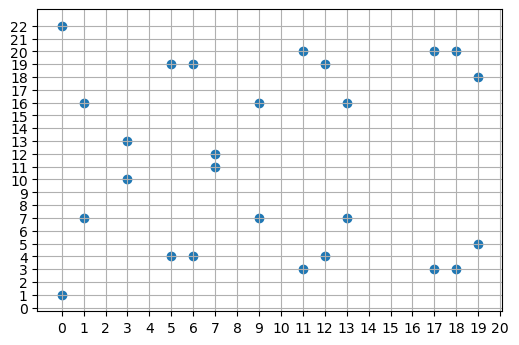

In [165]:
plt.rcParams['figure.dpi'] = 100
fig2, ax2 = plt.subplots()
ax2.set_xticks(np.arange(0,23,1))
ax2.set_yticks(np.arange(0,23,1))
X2 = xpoints_on_curve
Y2 = ypoints_on_curve
plt.scatter(X2, Y2)
plt.grid()
